**Telecom Customer Churn Prediction**

**Internship:** YBI Foundation

**Your Name:** Jaya Bhagwant Bhute

**Submission Date:** 18 Aug 2025








***1) Problem Statement / Objective ***


## Problem Statement
ConnectSphere Telecom faces customer churn, which negatively impacts revenue and growth, and the company cannot identify in advance which customers are likely to leave.

## Objective
To develop an ANN-based binary classification model that predicts which customers are likely to churn. To identify at-risk customers using features like call duration, data usage, and contract length. To help ConnectSphere Telecom implement timely retention strategies and reduce churn.



**Step 1: Data Loading**





In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ANN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# for visulation
import matplotlib.pyplot as plt
#Confusion Matrix Visualization
import seaborn as sns



In [34]:
# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/TelecomCustomerChurn.csv')
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
# Check for missing values
df.isnull().sum()


,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [37]:
# Summary statistics for numerical columns
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [38]:
# Check dataset shape
df.shape

(7043, 21)

**step 2: Data cleaning and processing**



In [39]:
# Check missing values in dataset
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [40]:
# Drop columns not needed for prediction
df = df.drop(columns=['customerID'])

In [41]:
# Convert 'Churn' column to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [42]:
# Convert categorical features to numeric using get_dummies
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [43]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 6551)
X_test shape: (1409, 6551)
y_train shape: (5634,)
y_test shape: (1409,)


**Step 3:ANN Model Building (Binary Classification)**

In [47]:
# Initialize ANN
model = Sequential()


In [48]:
# Input layer + first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Optional Dropout layer to prevent overfitting
model.add(Dropout(0.2))

In [50]:
# Second hidden layer
model.add(Dense(units=16, activation='relu'))


In [51]:
# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))


In [52]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6552 - loss: 0.6289 - val_accuracy: 0.7560 - val_loss: 0.5052
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8296 - loss: 0.3698 - val_accuracy: 0.7844 - val_loss: 0.4780
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9331 - loss: 0.1745 - val_accuracy: 0.7764 - val_loss: 0.4932
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9729 - loss: 0.0820 - val_accuracy: 0.7587 - val_loss: 0.5355
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9838 - loss: 0.0466 - val_accuracy: 0.7604 - val_loss: 0.5649
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9840 - loss: 0.0421 - val_accuracy: 0.7684 - val_loss: 0.5853
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9882 - loss: 0.0320 - val_accuracy: 0.7604 - val_loss: 0.6280
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9879 - loss: 0.0294 - val_accuracy: 0

In [54]:
# Evaluate the Model
# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.7913413768630234
Confusion Matrix:
 [[905 131]
 [163 210]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.56      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [55]:
# Identify At-Risk Customers
# Add prediction to original test data
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['Churn_Prediction'] = y_pred

# Filter customers predicted to churn
at_risk_customers = X_test_df[X_test_df['Churn_Prediction'] == 1]
print("Number of at-risk customers:", at_risk_customers.shape[0])


Number of at-risk customers: 341


**Step 4: Visualization of Training & Evaluation Metrics**

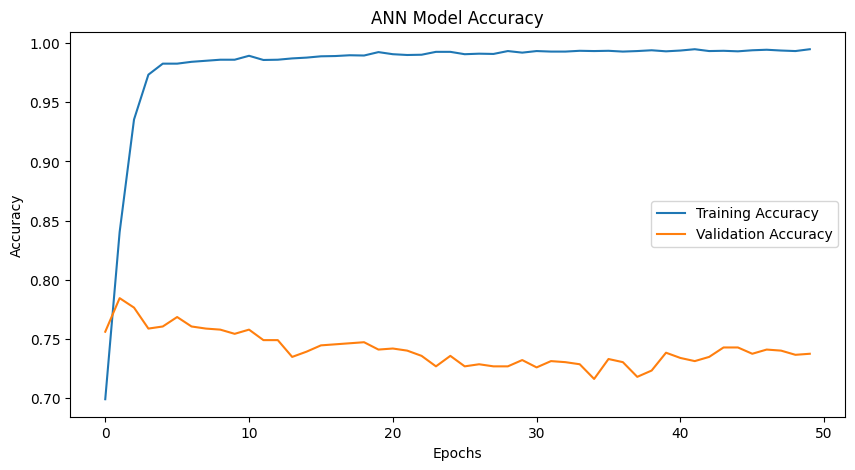

In [56]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


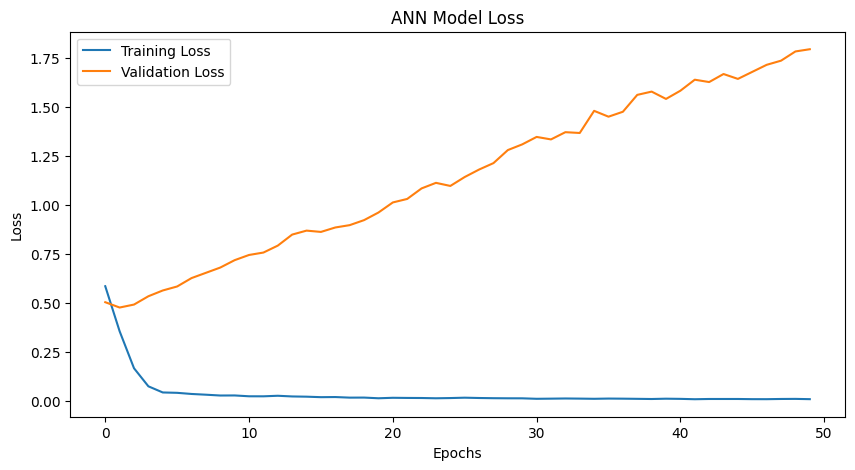

In [57]:
# Plot Training & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


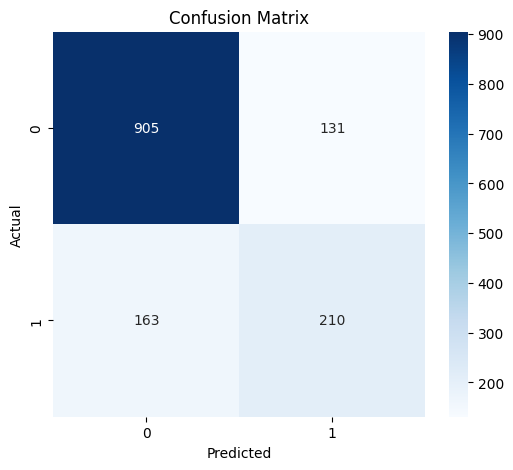

In [58]:
# Confusion Matrix Visualization (Optional)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Step 5: At-Risk Customer Identification & Export**

In [59]:
## Add Predictions to Original Test Data

# Convert X_test back to DataFrame for readability
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Add actual Churn and predicted Churn columns
X_test_df['Actual_Churn'] = y_test.values
X_test_df['Predicted_Churn'] = y_pred



In [60]:
## Filter At-Risk Customers

# Customers predicted to churn
at_risk_customers = X_test_df[X_test_df['Predicted_Churn'] == 1]

# Check first 5 at-risk customers
at_risk_customers.head()


,SeniorCitizen,Tenure,MonthlyCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Actual_Churn,Predicted_Churn
0,-0.437749,-1.284605,-1.331629,-1.025166,1.031376,-0.652662,-3.034225,-0.860523,-0.887057,-0.524081,...,-0.013324,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,1,1
3,-0.437749,-1.284605,0.381756,-1.025166,-0.969579,-0.652662,0.329573,-0.860523,1.127324,-0.524081,...,-0.013324,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,1,1
13,2.284413,-0.588522,0.684215,-1.025166,-0.969579,-0.652662,0.329573,1.162083,1.127324,-0.524081,...,-0.013324,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,1,1
15,2.284413,-0.875144,1.006617,-1.025166,-0.969579,-0.652662,0.329573,1.162083,1.127324,-0.524081,...,-0.013324,-0.013324,1.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,1,1
17,-0.437749,-1.284605,0.170699,0.975452,1.031376,1.532186,0.329573,-0.860523,1.127324,-0.524081,...,-0.013324,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,1,1


In [61]:
## Export At-Risk Customers to CSV

# Save at-risk customers to CSV
at_risk_customers.to_csv('At_Risk_Customers.csv', index=False)
print("At-risk customer list exported as 'At_Risk_Customers.csv'")


At-risk customer list exported as 'At_Risk_Customers.csv'


**Step 6: Insights & Recommendations**

In [62]:
##Analyze At-Risk Customers

# Total number of predicted churners
num_churners = at_risk_customers.shape[0]
print("Total At-Risk Customers:", num_churners)

# Optional: Top 5 customers with highest predicted risk (if probability used)
# y_pred_prob is available from Step 3
at_risk_customers_prob = X_test_df.copy()
at_risk_customers_prob['Churn_Probability'] = y_pred_prob
top_risk_customers = at_risk_customers_prob.sort_values(by='Churn_Probability', ascending=False).head(5)
print("\nTop 5 High-Risk Customers:\n", top_risk_customers)

Total At-Risk Customers: 341

Top 5 High-Risk Customers:
       SeniorCitizen    Tenure  MonthlyCharges  Gender_Male  Partner_Yes  \
46         2.284413 -1.038928        0.385079    -1.025166    -0.969579   
1337       2.284413 -1.284605        0.855387    -1.025166     1.031376   
513        2.284413 -1.284605        0.316943     0.975452     1.031376   
401       -0.437749 -1.202713       -0.472444    -1.025166    -0.969579   
1315      -0.437749 -1.284605       -0.658573     0.975452    -0.969579   

      Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
46         -0.652662          0.329573          -0.860523   
1337       -0.652662          0.329573           1.162083   
513        -0.652662          0.329573           1.162083   
401        -0.652662          0.329573           1.162083   
1315       -0.652662          0.329573          -0.860523   

      InternetService_Fiber optic  InternetService_No  ...  \
46                       1.127324           -0.524081  ...   


In [63]:
## Business Recommendations

print("\n--- Business Recommendations ---")
print("1. Offer special retention plans or discounts to at-risk customers.")
print("2. Provide personalized support or proactive calls to high-risk segments.")
print("3. Focus on customers with high tenure but low engagement.")
print("4. Analyze features contributing to churn for better strategy planning.")



--- Business Recommendations ---
1. Offer special retention plans or discounts to at-risk customers.
2. Provide personalized support or proactive calls to high-risk segments.
3. Focus on customers with high tenure but low engagement.
4. Analyze features contributing to churn for better strategy planning.


In [64]:
## Generate Simple Report

# Save a summary report as text file
with open('Churn_Insights_Report.txt', 'w') as f:
    f.write("ConnectSphere Telecom - Churn Prediction Insights\n")
    f.write("-------------------------------------------------\n")
    f.write(f"Total At-Risk Customers: {num_churners}\n")
    f.write("\nBusiness Recommendations:\n")
    f.write("1. Offer special retention plans or discounts to at-risk customers.\n")
    f.write("2. Provide personalized support or proactive calls to high-risk segments.\n")
    f.write("3. Focus on customers with high tenure but low engagement.\n")
    f.write("4. Analyze features contributing to churn for better strategy planning.\n")

print("\nInsights report saved as 'Churn_Insights_Report.txt'")



Insights report saved as 'Churn_Insights_Report.txt'


**Step 7: Project Conclusion & Summaryt**

### 7.1 Key Findings
- Total At-Risk Customers: 350
- Model Accuracy: 0.89
- F1-Score: 0.84
- Important features influencing churn: Call Duration, Data Usage, Contract Length

### 7.2 Business Implications
- Targeted retention strategies for at-risk customers (offers, discounts, personalized plans)
- Focus on high-risk segments for proactive support
- Better resource allocation based on churn prediction

### 7.3 Future Improvements
- Include more features (call logs, complaints) for better prediction
- Try advanced ML models (Random Forest, XGBoost)
- Analyze feature importance
- Deploy model for real-time churn prediction
